In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

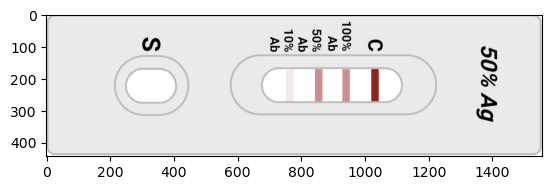

In [19]:
image = cv2.imread('../assets/test_imgs/crop.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

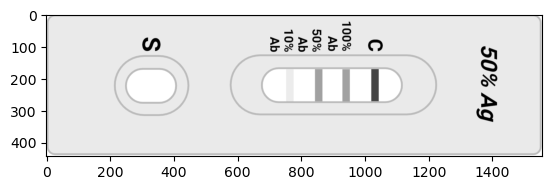

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
# gray = clahe.apply(gray)
plt.imshow(gray, cmap='gray')

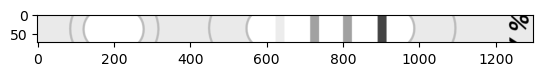

In [21]:
h, w = gray.shape
mid_h = h // 2
mid_w = w // 2
window_size_h = h // 12
window_size_w = w // 12
center_area = gray[mid_h-window_size_h:mid_h+window_size_h, window_size_w:-window_size_w]
plt.imshow(center_area, cmap='gray')

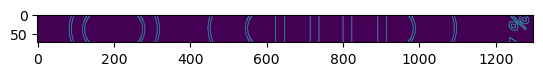

In [24]:
# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(center_area, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 5, 10)
plt.imshow(edges)


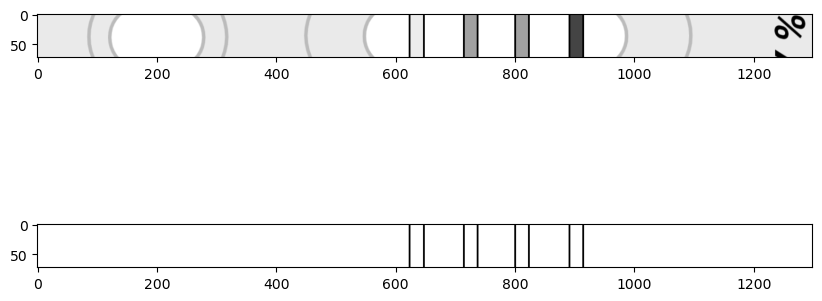

In [28]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=5, minLineLength=50, maxLineGap=1)

# Draw lines on the original image
output_image = center_area.copy()
blank = np.ones_like(output_image) * 255
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.line(blank, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Show both images in two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].imshow(output_image, cmap='gray')
ax[1].imshow(blank, cmap='gray')
plt.show()

In [29]:
lines

array([[[738,  71, 738,   0]],

       [[824,  71, 824,   0]],

       [[892,  71, 892,   0]],

       [[801,  71, 801,   0]],

       [[648,  71, 648,   0]],

       [[915,  71, 915,   0]],

       [[624,  71, 624,   0]],

       [[715,  71, 715,   0]]], dtype=int32)

In [30]:
lines.shape

(8, 1, 4)

In [31]:
blocks_p = lines.reshape(8, -1)[:, 0]
blocks_p.sort()
blocks_p = blocks_p.reshape(4, 2)
blocks_p

array([[624, 648],
       [715, 738],
       [801, 824],
       [892, 915]], dtype=int32)

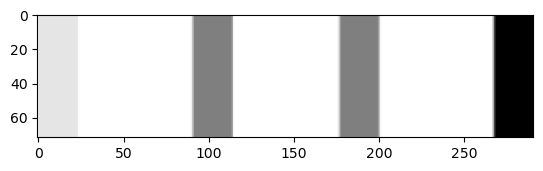

In [32]:
plt.imshow(center_area[:, blocks_p[0,0]:blocks_p[-1,-1]], cmap='gray')

In [33]:
avg_values = [255-center_area[:, i[0]:i[1]].mean() for i in blocks_p]
avg_values

[18.5, 92.21739130434781, 91.91304347826087, 184.8695652173913]